Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Import Data</h3>

In [3]:
df=pd.read_csv("part-00000-9b1c7e6e-98f2-4960-ab45-7a15f2047897-c000.csv")

In [4]:
df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CRS_DEP_TIME           0
dtype: int64

In [5]:
df.nunique()

FL_DATE                2513
OP_CARRIER                1
OP_CARRIER_FL_NUM      5851
ORIGIN                    1
DEST                     45
DEP_TIME               1288
DEP_DELAY               398
CRS_ARR_TIME            231
ARR_TIME               1317
ARR_DELAY               440
CANCELLED                 1
DIVERTED                  1
CRS_ELAPSED_TIME         61
ACTUAL_ELAPSED_TIME     352
AIR_TIME                324
DISTANCE                 46
CRS_DEP_TIME            222
dtype: int64

In [6]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CRS_DEP_TIME
0,2012-11-11,WN,2416,ATL,AUS,08:53:00,-2,10:45:00,10:23:00,-22,0.0,0.0,170,150,135,813.0,08:55:00
1,2012-11-11,WN,2451,ATL,AUS,16:22:00,7,17:55:00,17:55:00,0,0.0,0.0,160,153,132,813.0,16:15:00
2,2012-11-11,WN,257,ATL,BWI,20:49:00,19,22:25:00,22:44:00,19,0.0,0.0,115,115,87,577.0,20:30:00
3,2012-11-11,WN,2550,ATL,BWI,08:05:00,-5,09:55:00,09:48:00,-7,0.0,0.0,105,103,88,577.0,08:10:00
4,2012-11-11,WN,3331,ATL,BWI,18:25:00,5,20:10:00,20:28:00,18,0.0,0.0,110,123,93,577.0,18:20:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205386 entries, 0 to 205385
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              205386 non-null  object 
 1   OP_CARRIER           205386 non-null  object 
 2   OP_CARRIER_FL_NUM    205386 non-null  int64  
 3   ORIGIN               205386 non-null  object 
 4   DEST                 205386 non-null  object 
 5   DEP_TIME             205386 non-null  object 
 6   DEP_DELAY            205386 non-null  int64  
 7   CRS_ARR_TIME         205386 non-null  object 
 8   ARR_TIME             205386 non-null  object 
 9   ARR_DELAY            205386 non-null  int64  
 10  CANCELLED            205386 non-null  float64
 11  DIVERTED             205386 non-null  float64
 12  CRS_ELAPSED_TIME     205386 non-null  int64  
 13  ACTUAL_ELAPSED_TIME  205386 non-null  int64  
 14  AIR_TIME             205386 non-null  int64  
 15  DISTANCE         

<h3>Split Timestamp</h3>

In [8]:
df[["year", "month", "day"]] = df["FL_DATE"].str.split("-", expand = True)
df[["HOUR", "MIN", "SEC"]] = df["CRS_DEP_TIME"].str.split(":", expand = True)

In [9]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CRS_DEP_TIME,year,month,day,HOUR,MIN,SEC
0,2012-11-11,WN,2416,ATL,AUS,08:53:00,-2,10:45:00,10:23:00,-22,...,150,135,813.0,08:55:00,2012,11,11,08,55,00
1,2012-11-11,WN,2451,ATL,AUS,16:22:00,7,17:55:00,17:55:00,0,...,153,132,813.0,16:15:00,2012,11,11,16,15,00
2,2012-11-11,WN,257,ATL,BWI,20:49:00,19,22:25:00,22:44:00,19,...,115,87,577.0,20:30:00,2012,11,11,20,30,00
3,2012-11-11,WN,2550,ATL,BWI,08:05:00,-5,09:55:00,09:48:00,-7,...,103,88,577.0,08:10:00,2012,11,11,08,10,00
4,2012-11-11,WN,3331,ATL,BWI,18:25:00,5,20:10:00,20:28:00,18,...,123,93,577.0,18:20:00,2012,11,11,18,20,00


<h3>Feature Selection</h3>
<p>The values of the features are not available brfore flight departure
ARR_TIME
</p>

In [10]:
df=df.drop('FL_DATE',1)
df=df.drop('CRS_DEP_TIME',1)
df=df.drop('DEP_TIME',1)

<p>Assigning labels to numerical values</p>

In [11]:
df['DEP_STATUS'] = ['OnTime' if x <15 else 'Delay' for x in df['DEP_DELAY']]

In [12]:
df['DEP_STATUS'].value_counts()

OnTime    153522
Delay      51864
Name: DEP_STATUS, dtype: int64

In [13]:
df=df.drop('CRS_ARR_TIME',1)
df=df.drop('ARR_TIME',1)
df=df.drop('ARR_DELAY',1)
df=df.drop('CANCELLED',1)
df=df.drop('DIVERTED',1)
df=df.drop('ACTUAL_ELAPSED_TIME',1)
df=df.drop('AIR_TIME',1)

<p>Model trained for Origin as ALT and OP_CCARRIER as WN</p>

In [14]:
df=df.drop('ORIGIN',1)
df=df.drop('OP_CARRIER',1)

In [15]:
df=df.drop('SEC',1)


In [16]:
df.head()


,OP_CARRIER_FL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,year,month,day,HOUR,MIN,DEP_STATUS
0,2416,AUS,-2,170,813.0,2012,11,11,08,55,OnTime
1,2451,AUS,7,160,813.0,2012,11,11,16,15,OnTime
2,257,BWI,19,115,577.0,2012,11,11,20,30,Delay
3,2550,BWI,-5,105,577.0,2012,11,11,08,10,OnTime
4,3331,BWI,5,110,577.0,2012,11,11,18,20,OnTime


<p>Dependent and Independent feature assignment</p>

In [17]:
X=df.drop("DEP_DELAY",1)
X=X.drop("DEP_STATUS",1).values
y=df.iloc[:,-1].values


<h4>LabelEncoding</h4>

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X

array([[2303, 'AUS', 170, ..., '11', '08', '55'],
       [2337, 'AUS', 160, ..., '11', '16', '15'],
       [218, 'BWI', 115, ..., '11', '20', '30'],
       ...,
       [1541, 'MDW', 115, ..., '09', '11', '00'],
       [2234, 'MDW', 120, ..., '09', '15', '35'],
       [567, 'PHX', 255, ..., '09', '10', '15']], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
ct=ColumnTransformer([("ohe",OneHotEncoder(categories='auto'),[1])],remainder="passthrough")
X=ct.fit_transform(X)


<h4>Train test split</h4>

In [22]:
from sklearn.model_selection import train_test_split
Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.2)

<h4>Training Model</h4>

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt= DecisionTreeClassifier()
dt.fit(Xtr,ytr) 
dt.score(Xts,yts)

0.7049515555771946

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier(n_estimators=7)
rf.fit(Xtr,ytr) 
rf.score(Xts,yts)

0.7277861629095866

In [27]:
ypred=rf.predict(Xts)

In [28]:
yts[40:]

array(['OnTime', 'OnTime', 'OnTime', ..., 'OnTime', 'OnTime', 'OnTime'],
      dtype=object)

In [29]:
ypred[40:]

array(['OnTime', 'Delay', 'OnTime', ..., 'OnTime', 'OnTime', 'OnTime'],
      dtype=object)

<h4>Confussion Matrix</h4>

In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score,classification_report

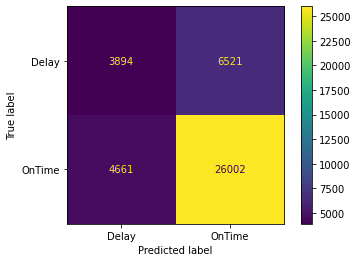

In [31]:
plot_confusion_matrix(rf,Xts,yts);

In [32]:
accuracy_score(yts,ypred)

0.7277861629095866

In [33]:
print(classification_report(yts,ypred))

              precision    recall  f1-score   support

       Delay       0.46      0.37      0.41     10415
      OnTime       0.80      0.85      0.82     30663

    accuracy                           0.73     41078
   macro avg       0.63      0.61      0.62     41078
weighted avg       0.71      0.73      0.72     41078



<h2>Round 2</h2>

In [34]:
X2=df.drop(["DEP_DELAY",'year','month','day','HOUR','MIN'],1)
X2=X2.drop("DEP_STATUS",1).values
y2=df.iloc[:,-1].values

In [35]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
X2[:,1]=le2.fit_transform(X2[:,1])
X2[1:2]

array([[2451, 0, 160, 813.0]], dtype=object)

In [36]:
from sklearn.model_selection import train_test_split
Xtr2,Xts2,ytr2,yts2=train_test_split(X2,y2,test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt2= DecisionTreeClassifier()
dt2.fit(Xtr2,ytr2) 
dt2.score(Xts2,yts2)

0.7546618627976046

In [38]:
rf2=RandomForestClassifier()
rf2.fit(Xtr2,ytr2) 
rf2.score(Xts2,yts2)

0.7593602414917962

In [39]:
rf2.predict([[8554,1,188,1500]])

array(['OnTime'], dtype=object)

In [40]:
from sklearn.model_selection import GridSearchCV 

In [41]:
grid = dict() 
grid['n_estimators'] = [3,5,10,50] 
grid['criterion'] = ['gini', 'entropy'] 
grid['max_depth'] = [3,5,7,11] 

In [42]:
tunedClassifier = RandomForestClassifier() 
rf_tuned = GridSearchCV(tunedClassifier, grid) 
rf_tuned.fit(Xtr2,ytr2) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [3, 5, 10, 50]})

In [43]:
rf_tuned.best_params_ 

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 5}

In [44]:
classifier = RandomForestClassifier(n_estimators=11, max_depth=5,criterion='entropy') 
classifier.fit(Xtr2,ytr2) 
classifier.score(Xts2,yts2)

0.7467987730658747

In [45]:
from sklearn.model_selection import cross_val_score 

In [46]:
results = cross_val_score(classifier, Xtr2, ytr2, cv=5)

In [47]:
print(f"Average Accuracy: {round(results.mean(),2)} with +/-: {round(results.std(),2)}") 

Average Accuracy: 0.75 with +/-: 0.0


In [48]:
import pickle

In [49]:
f=open("Airline_delay.h5",'wb')
pickle.dump(classifier,f)
f.close()